# Hepatitis C Detection using K-Nearest Neighbor (KNN)
---

Hepatitis C adalah jenis penyakit hati yang disebabkan oleh infeksi virus hepatitis C (HCV). Virus ini dapat menyerang hati dan menyebabkan peradangan serta kerusakan pada organ tersebut. Hepatitis C dapat menjadi penyakit kronis dan dalam beberapa kasus dapat berkembang menjadi sirosis hati atau kanker hati.


**STAGE OF LIVER DAMAGE DUE TO HEPATITIS C**

![Images](https://www.mdpi.com/viruses/viruses-04-02251/article_deploy/html/images/viruses-04-02251-g002.png)


**STUDI KASUS**

Algoritma K-Nearest Neighbors (KNN) dapat digunakan untuk membantu dalam deteksi hepatitis C. Dalam konteks ini, dataset yang terdiri dari atribut klinis dan hasil tes laboratorium pasien yang terinfeksi hepatitis C dapat digunakan untuk melatih model KNN. Setelah melatih model, algoritma KNN dapat digunakan untuk memprediksi apakah pasien baru kemungkinan terinfeksi hepatitis C berdasarkan atribut mereka.

**Nama Anggota :**
1.   Hanin Nafi'ah (2101222083)
2.   Vi Bauty Riska Utami (2101222073)

## Tahap 1 : Import Dataset dan Library


In [1]:
# Import the csv data
from google.colab import files
files.upload()

Saving HepatitisCdata.csv to HepatitisCdata (3).csv


{'HepatitisCdata.csv': b'"","Category","Age","Sex","ALB","ALP","ALT","AST","BIL","CHE","CHOL","CREA","GGT","PROT"\r\n"1","0=Blood Donor",32,"m",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69\r\n"2","0=Blood Donor",32,"m",38.5,70.3,18,24.7,3.9,11.17,4.8,74,15.6,76.5\r\n"3","0=Blood Donor",32,"m",46.9,74.7,36.2,52.6,6.1,8.84,5.2,86,33.2,79.3\r\n"4","0=Blood Donor",32,"m",43.2,52,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7\r\n"5","0=Blood Donor",32,"m",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7\r\n"6","0=Blood Donor",32,"m",41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91,74\r\n"7","0=Blood Donor",32,"m",46.3,41.3,17.5,17.8,8.5,7.01,4.79,70,16.9,74.5\r\n"8","0=Blood Donor",32,"m",42.2,41.9,35.8,31.1,16.1,5.82,4.6,109,21.5,67.1\r\n"9","0=Blood Donor",32,"m",50.9,65.5,23.2,21.2,6.9,8.69,4.1,83,13.7,71.3\r\n"10","0=Blood Donor",32,"m",42.4,86.3,20.3,20,35.2,5.46,4.45,81,15.9,69.9\r\n"11","0=Blood Donor",32,"m",44.3,52.3,21.7,22.4,17.2,4.15,3.57,78,24.1,75.4\r\n"12","0=Blood Donor",33,"m",46.4,68.2,10.3

In [2]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings('ignore')

## Tahap 2 : Exploratory Data Analysis (EDA)



In [3]:
# Loading up the dataset
data = pd.read_csv('./HepatitisCdata.csv')
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
# Description of dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
# Duplicate the dataset and then remove unnecessary columns
df = data.copy()
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
# Displays statistical information from the numerical data
print(data.describe())

       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

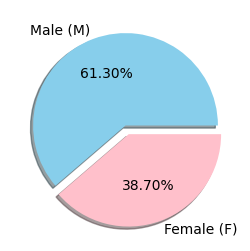

In [7]:
# Pie chart for Data Gender
fig, ax = plt.subplots(figsize=(3,3))
plt.pie(x=df["Sex"].value_counts(),
        colors=["skyblue","pink"],
        labels=["Male (M)","Female (F)"],
        shadow = True,
        autopct="%1.2f%%",
        explode = (0, 0.1))
plt.show()

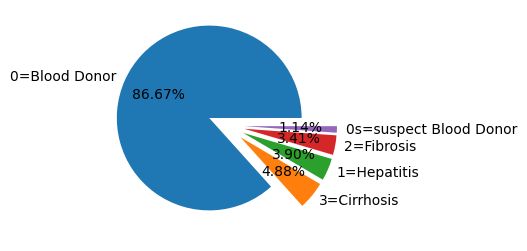

In [8]:
# Pie chart for Data Category
data_pie = df['Category'].value_counts()
fig, ax = plt.subplots(figsize=(3,3))
mycolor = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

plt.pie(x=data_pie,
        labels = data_pie.index,
        colors = mycolor,
        autopct="%1.2f%%",
        explode = (0.2, 0.2, 0.2, 0.2, 0.2))
plt.show()

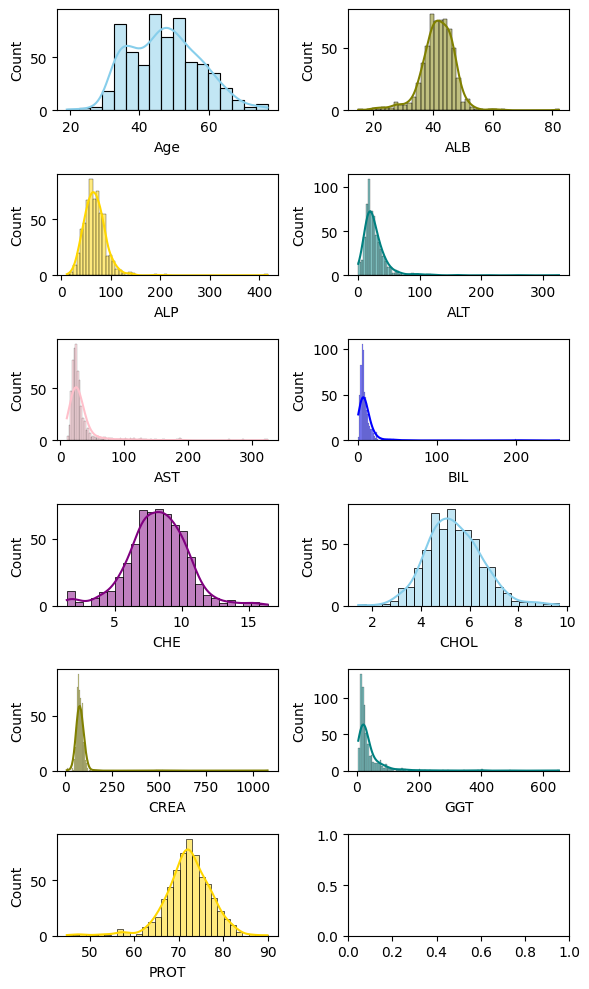

In [9]:
# Histogram for numerical data
fig,axs = plt.subplots(6,2, figsize = (6,10))
sns.histplot(data=df, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="ALB", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="ALP", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="ALT", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="AST", kde=True, color="pink", ax=axs[2, 0])
sns.histplot(data=df, x="BIL", kde=True, color="blue", ax=axs[2, 1])
sns.histplot(data=df, x="CHE", kde=True, color="purple", ax=axs[3, 0])
sns.histplot(data=df, x="CHOL", kde=True, color="skyblue", ax=axs[3, 1])
sns.histplot(data=df, x="CREA", kde=True, color="olive", ax=axs[4, 0])
sns.histplot(data=df, x="GGT", kde=True, color="teal", ax=axs[4, 1])
sns.histplot(data=df, x="PROT", kde=True, color="gold", ax=axs[5, 0])
fig.tight_layout()

## Tahap 3 : Pre-processing

In [10]:
# Used to fill in missing value
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(df.iloc[:,[3,4,5,9,12]])
df.iloc[:,[3,4,5,9,12]] = imputer.transform(df.iloc[:,[3,4,5,9,12]])

In [11]:
# Changing categorical data to numeric
le = LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Age"]=le.fit_transform(df["Age"])
df["Category"]=le.fit_transform(df["Category"])

In [12]:
# Split attribute (X) data and labels (y)
X = df.iloc[:,3:].values
y = df.iloc[:,0].values

In [13]:
# Normalising the range of features in a dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Handling for imbalance class
sm = SMOTE(random_state=14)
X_smote, y_smote = sm.fit_resample(X, y)

#Spliting data digunakan untuk membagi data latih dan data uji
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2,random_state=0)

print('Total sampel untuk data training sebanyak {} dan sampel untuk data testing sebanyak {} sample'.format(X_train.shape[0], X_test.shape[0]))

Total sampel untuk data training sebanyak 2132 dan sampel untuk data testing sebanyak 533 sample


## Tahap 4 : Modeling K-Nearest Neighbor (KNN)

In [15]:
# Building Model with k value
k = 4

knn_type1 = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
knn_type1.fit(X_train, y_train)
y_pred_type1 = knn_type1.predict(X_test)
acc_score_1 = accuracy_score(y_test,y_pred_type1)
mse_score_1 = mse(y_test,y_pred_type1)

knn_type2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
knn_type2.fit(X_train, y_train)
y_pred_type2 = knn_type2.predict(X_test)
acc_score_2 = accuracy_score(y_test,y_pred_type2)
mse_score_2 = mse(y_test,y_pred_type2)

knn_type3 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='distance')
knn_type3.fit(X_train, y_train)
y_pred_type3 = knn_type3.predict(X_test)
acc_score_3 = accuracy_score(y_test,y_pred_type3)
mse_score_3 = mse(y_test,y_pred_type3)

knn_type4 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', weights='uniform')
knn_type4.fit(X_train, y_train)
y_pred_type4 = knn_type4.predict(X_test)
acc_score_4 = accuracy_score(y_test,y_pred_type4)
mse_score_4 = mse(y_test,y_pred_type4)

knn_type5 = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
knn_type5.fit(X_train, y_train)
y_pred_type5 = knn_type5.predict(X_test)
acc_score_5 = accuracy_score(y_test,y_pred_type5)
mse_score_5 = mse(y_test,y_pred_type5)

knn_type6 = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='uniform')
knn_type6.fit(X_train, y_train)
y_pred_type6 = knn_type6.predict(X_test)
acc_score_6 = accuracy_score(y_test,y_pred_type6)
mse_score_6 = mse(y_test,y_pred_type6)

In [16]:
models = pd.DataFrame({
    'Model': ['K-Nearest Neighbor', 'K-Nearest Neighbor', 'K-Nearest Neighbor','K-Nearest Neighbor', 'K-Nearest Neighbor', 'K-Nearest Neighbor'],
    'Metric' : ['Euclidean', 'Euclidean', 'Minkowski', 'Minkowski', 'Manhattan', 'Manhattan'],
    'Weights' : ['Distance','Uniform','Distance','Uniform','Distance','Uniform'],
    'Score': [acc_score_1,acc_score_2,acc_score_3,acc_score_4,acc_score_5,acc_score_6],
    'MSE': [mse_score_1,mse_score_2,mse_score_3,mse_score_4,mse_score_5,mse_score_6]})

# models.sort_values(by='Score', ascending=False)
models

,Model,Metric,Weights,Score,MSE
0,K-Nearest Neighbor,Euclidean,Distance,0.988743,0.048780
1,K-Nearest Neighbor,Euclidean,Uniform,0.986867,0.039400
2,K-Nearest Neighbor,Minkowski,Distance,0.988743,0.048780
3,K-Nearest Neighbor,Minkowski,Uniform,0.986867,0.039400
4,K-Nearest Neighbor,Manhattan,Distance,0.986867,0.060038
5,K-Nearest Neighbor,Manhattan,Uniform,0.986867,0.060038


## Tahap 5 : Data Prediction dan Evaluation

In [17]:
# Report Prediction
print(classification_report(y_test,y_pred_type1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        98
           1       0.99      1.00      1.00       121
           2       0.96      1.00      0.98        98
           3       0.99      1.00      0.99        99
           4       1.00      1.00      1.00       117

    accuracy                           0.99       533
   macro avg       0.99      0.99      0.99       533
weighted avg       0.99      0.99      0.99       533



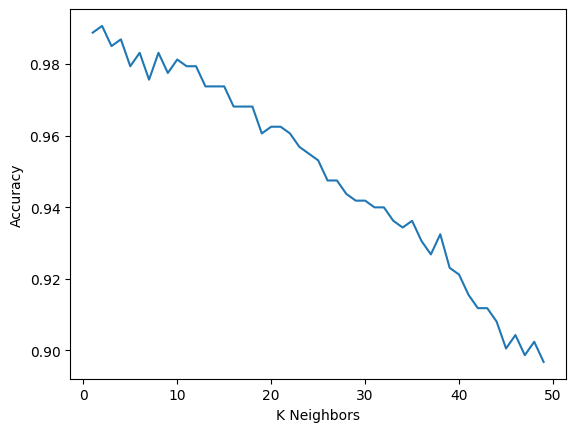

In [18]:
# find k value for best accuracy %%
score_list = []
for each in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test,y_test))

plt.plot(range(1,50),score_list)
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.show()

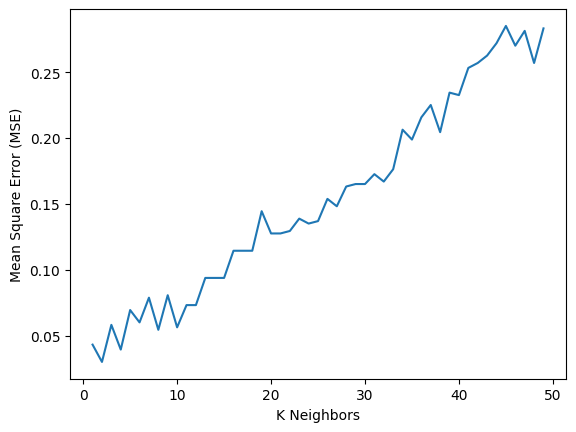

In [19]:
# find k value from mse %%
mse_test = []
for each in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(X_train,y_train)
    score_mse = knn.predict(X_test)
    score_mse = mse(score_mse, y_test)
    mse_test.append(score_mse)

plt.plot(range(1,50),mse_test)
plt.xlabel("K Neighbors")
plt.ylabel("Mean Square Error (MSE)")
plt.show()

## Catatan Elaborasi Tugas Besar - Sitem Cerdas

> Buatlah model menggunakan beberapa parameter saja dari datas
 (10 Parameter : ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT). Pilihlah beberapa (3-5 parameter) dengan korelasi atribut yang terbesar dan mudah dijangkau oleh masyarakat. Kemudian simulasikan akurasi dan error sesuai dengan model yang sudah dibuat sebelumnya.



In [24]:
from sklearn.feature_selection import f_regression, SelectKBest

# Split data and parameter
X_df = data.iloc[:,4:]
y_df = data.iloc[:,1]

# Preprocessing for handling missing value and changing categorical data into numeric
X_df = X_df.apply(lambda x: x.fillna(x.mean()),axis = 0)
y_df = le.fit_transform(y_df)

# Applying SelectKBest class to extract top 5 best features
fs = SelectKBest(score_func=f_regression,k=5)
fit = fs.fit(X_df,y_df)

# Assigning column names
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X_df.columns)
feature_score = pd.concat([features,features_score],axis=1)
feature_score.columns = ["Input Parameter (Features)","F_Score"]
print(feature_score.nlargest(5,columns="F_Score"))

  Input Parameter (Features)     F_Score
3                        AST  444.528329
4                        BIL  176.678485
8                        GGT  174.913636
5                        CHE   74.645270
6                       CHOL   60.739136


In [25]:
# Spliting Data for X and y
X_df_selected = data.iloc[:,[7,8,12,9,10]]
y_df_selected = data.iloc[:,1]

# Preprocessing for handling missing value and changing categorical data into numeric
X_df_selected = X_df_selected.apply(lambda x: x.fillna(x.mean()),axis = 0)
y_df_selected = le.fit_transform(y_df_selected)

# Normalising the range of features in a dataset
scaler = StandardScaler()
X_df_selected = scaler.fit_transform(X_df_selected)

# Handling for imbalance class
sm = SMOTE(random_state=14)
X_smote_df, y_smote_df = sm.fit_resample(X_df_selected, y_df_selected)

#Spliting data digunakan untuk membagi data latih dan data uji
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_smote_df, y_smote_df, test_size=.2, random_state=0)

print('Total sampel untuk data training sebanyak {} dan sampel untuk data testing sebanyak {} sample'.format(X_train.shape[0], X_test.shape[0]))

Total sampel untuk data training sebanyak 2132 dan sampel untuk data testing sebanyak 533 sample


In [26]:
knn_df = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
knn_df.fit(X_train_df, y_train_df)

KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')

In [27]:
# Model prediction with selected top 5 best features
y_pred_df = knn_df.predict(X_test_df)
acc_score_df = accuracy_score(y_test_df, y_pred_df)
mse_score_df = mse(y_test_df, y_pred_df)

print("Accuracy Score",acc_score_df)
print("MSE (Mean Squared Error)",mse_score_df)

Accuracy Score 0.9643527204502814
MSE (Mean Squared Error) 0.1651031894934334
